# Introduction

Red wine is a popular beverage enjoyed worldwide for its complex flavors and aromas. Understanding the factors that contribute to wine quality is crucial for producers and consumers alike. This report aims to analyze a dataset of red wine quality from the UCI Machine Learning Repository to identify key characteristics that influence wine quality. The dataset, sourced from the University of Corvinus in Budapest, Hungary, contains chemical and sensory attributes of 1599 red wine samples. This analysis will delve into the relationships between these attributes and the wine's overall quality, measured on a scale of 3 to 7.
(https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [33]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy import stats 

from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler



The first step in our analysis involved acquiring the wine quality dataset. This file contains information on various chemical and sensory attributes of 1599 red wine samples, along with their corresponding quality scores.

In [34]:
# Load the wine quality dataset from the CSV file
data = pd.read_csv('winequality-red.csv')

## Exploratory Data Analysis (EDA)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Our initial data exploration employed the .info() method to confirm the successful loading of the red wine quality data. The DataFrame contains 1599 rows, representing individual wine samples, and 12 columns corresponding to various chemical and sensory attributes measured for each wine. The data types suggest primarily numerical features with potentially one categorical feature representing wine quality rating.

In [36]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This function displays the first few rows () of the DataFrame, providing a quick look at the actual data points and column names.

In [37]:
data.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

Rename the columns for enhanced usability.

In [38]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The data description encompasses statistical measures such as mean, standard deviation, minimum, quartiles, and maximum values. These metrics offer insights into the central tendency, variability, and distribution of the dataset's numerical attributes, aiding in understanding its overall characteristics and potential patterns.

In [39]:
classes = data['quality'].value_counts()
classes

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

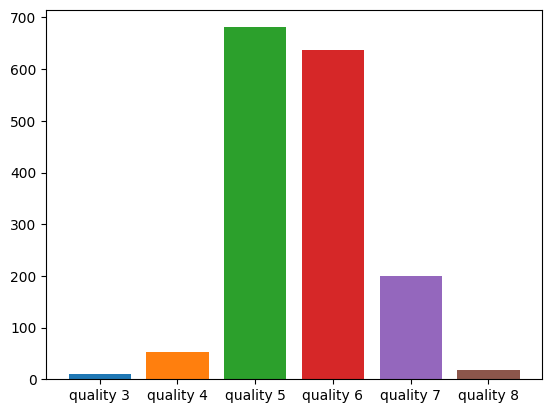

In [40]:
plt.bar('quality 3' , classes[3])
plt.bar('quality 4' , classes[4])   
plt.bar('quality 5' , classes[5]) 
plt.bar('quality 6' , classes[6])   
plt.bar('quality 7' , classes[7])   
plt.bar('quality 8' , classes[8])        
plt.show()

The target feature in our dataset is "quality," which comprises six discrete levels ranging from 3 to 8. Notably, there is an uneven distribution among these levels, with instances of qualities 5 and 6 substantially outnumbering those of the other categories.

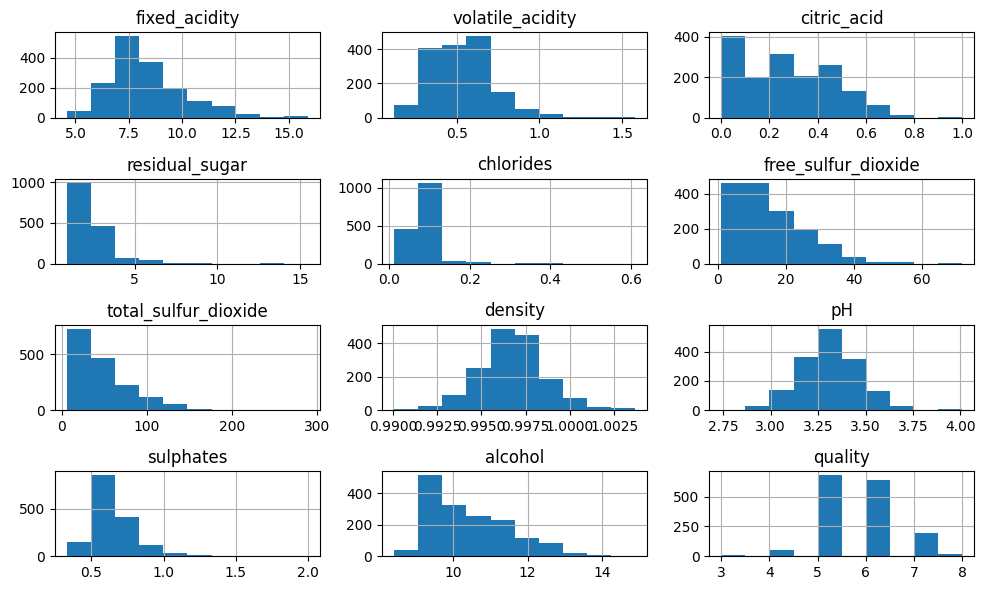

In [41]:
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

Diving into the world of this wine quality data, we're greeted with a visual representation of its core characteristics. Histograms paint a picture of how frequently values fall within specific ranges for each feature. Let's take a closer look:

Acidity seems to play a balancing act. "Fixed acidity" appears comfortable around a value of 7, with a distribution suggesting most wines fall within a predictable range.  "Volatile acidity," however, tells a different story. While it also seems centered around 0.5, its distribution leans towards lower values, hinting that most wines boast commendably low volatile acidity, a quality factor.

Sugars and chlorides showcase contrasting behaviors.  "Residual sugar" exhibits a preference for the low end of the spectrum, with a clear bias towards drier wines.  In contrast, "chlorides" seem to favor higher values, with most data points concentrated above 0.2.

Sulfur dioxide levels seem to be kept in check. Both "free sulfur dioxide" and "total sulfur dioxide" distributions lean towards the lower end, suggesting most wines stay within moderate ranges for these preservatives.

Finally, density and pH exhibit a calmness in their distributions. "Density" settles comfortably around a value of 1.000, indicating a typical density for most wines.  Similarly, "pH" appears content around 3, suggesting a prevalence of wines within a normal pH range.


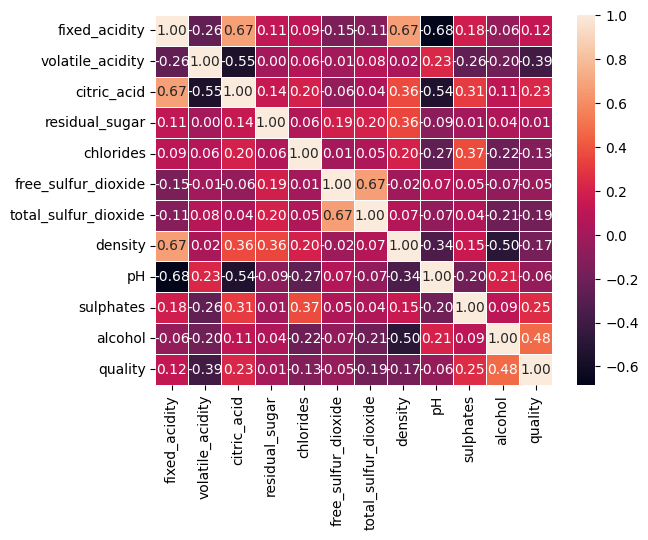

In [42]:
corr_matrix = data.corr()
ax= sn.heatmap(corr_matrix, annot=True, linewidths=.5 , fmt= ".2f")
ax.set(xlabel='',ylabel='')
plt.show()

Delving into the quality of wines in this dataset, we find that certain traits are connected in interesting ways. For instance, higher alcohol levels are somewhat linked to better quality, while high levels of volatile acidity are strongly linked to lower quality, probably because they taste too vinegary. Acidity is a bit more complicated—wines with higher fixed acidity tend to be slightly less favored. But when it comes to density and pH, things get clearer: denser wines and those with lower pH levels are often considered lower quality. However, it's important to remember that just because two things are related doesn't mean one causes the other. We need to keep exploring to understand all the factors that make a truly exceptional wine.

## Data Preprocessing

In [43]:
def classy(old_class):
  
  if old_class <= 5:
    return 0
  else:
    return 1

data['quality'] = data['quality'].apply(classy)

In [44]:
classes = data['quality'].value_counts()
classes

quality
1    855
0    744
Name: count, dtype: int64

Given the uneven spread of quality ratings, we've simplified things by dividing them into just two groups: "low" and "high" quality. We've put qualities 3, 4, and 5 in the "low" category, and qualities 6, 7, and 8 in the "high" category. This tweak makes sure there's a fairer balance between the labels. It also makes it easier to analyze and predict quality levels, keeping things straightforward and improving how well our models work.

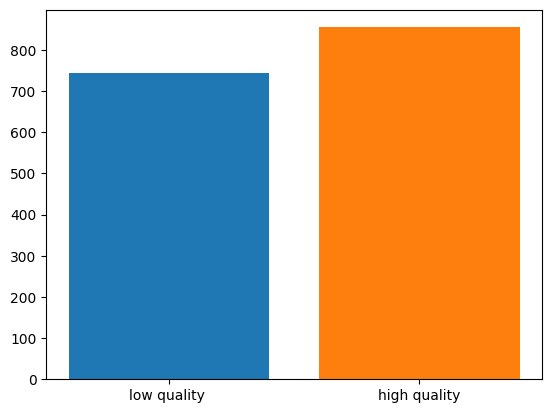

In [45]:
plt.bar('low quality ' , classes[0])
plt.bar('high quality' , classes[1]) 
plt.show()

In [46]:
len (data)

1599

In [47]:
data.duplicated().sum()

240

Out of the 1599 rows of data, 240 are duplicates.

In [48]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [50]:
len(data)

1359


After removing the duplicate entries, the dataset contains 1359 unique rows.

In [49]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null or undefined values present in the dataset, thus affirming the completeness and integrity of the data.

In [51]:
data["fixed_acidity"] = np.log1p(data["fixed_acidity"])
data["volatile_acidity"] = np.log1p(data["volatile_acidity"])
data["citric_acid"] = np.sqrt(data["citric_acid"])
data["residual_sugar"] = np.sqrt(data["residual_sugar"])
data["chlorides"] = np.sqrt(data["chlorides"])
data["free_sulfur_dioxide"] = np.sqrt(data["free_sulfur_dioxide"])
data["total_sulfur_dioxide"] = np.sqrt(data["total_sulfur_dioxide"])
data["sulphates"] = np.sqrt(data["sulphates"])
data["alcohol"], _ = stats.boxcox(data["alcohol"] + 1)

Efforts were made to adjust the features to approximate a normal distribution. This involved applying transformations and adjustments to the data to achieve distributions resembling the bell-shaped curve characteristic of a normal distribution. We applied various techniques such as root transformation, logarithmic transformation, and the Box-Cox method to address right-skewed features within the dataset, such as residual sugar and total sulfur dioxide. These features exhibited a tendency towards higher values, resulting in skewed distributions. By applying these transformation methods, we aimed to normalize the distributions of these features, making them more symmetric and suitable for statistical analysis.

In [52]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Applying the function to remove outliers for each relevant column
columns_to_remove_outliers = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","sulphates","alcohol","pH","density"] 
for col in columns_to_remove_outliers:
    data = remove_outliers(data, col)

#Removing rows with any NaN values after removing outliers
data = data.dropna()
data.reset_index(drop=True, inplace=True)

Removing outliers.


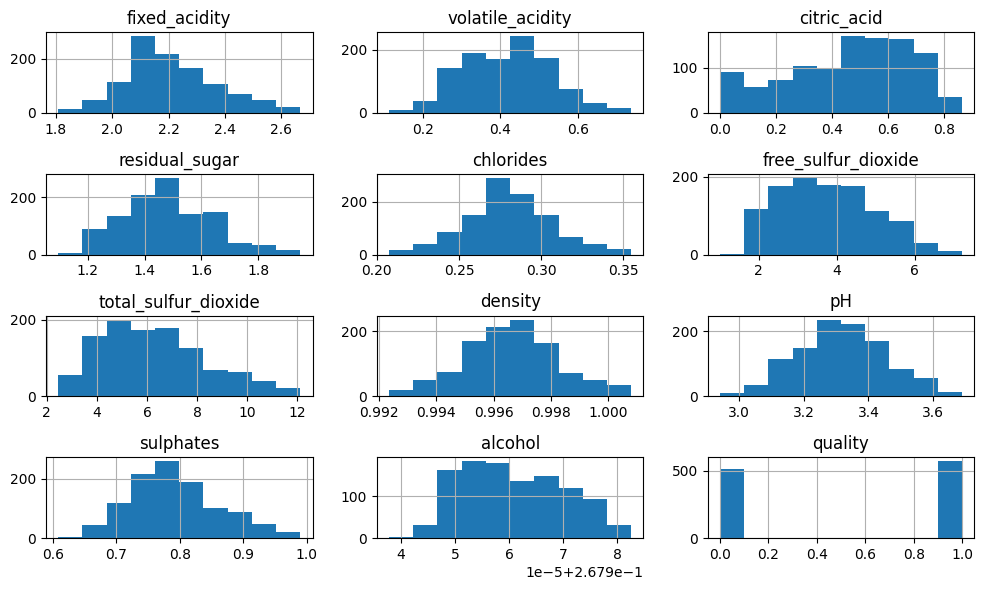

In [53]:
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

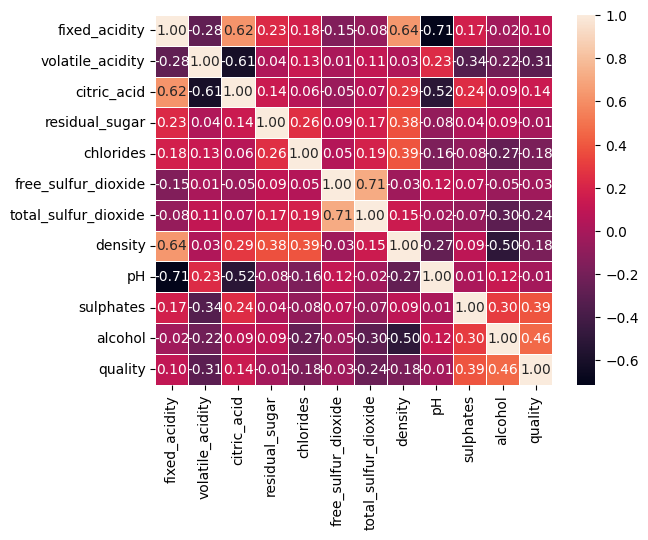

In [54]:
corr_matrix = data.corr()
ax= sn.heatmap(corr_matrix, annot=True, linewidths=.5 , fmt= ".2f")
ax.set(xlabel='',ylabel='')
plt.show()

In [55]:
len(data)

1084


Following the removal of outliers, the dataset comprises 1084 instances remaining .

In [56]:
y = data["quality"]
X = data.drop("quality", axis = 1)


In [57]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

We standardized the values of X to improve their suitability for analysis. Standardization involves transforming the data in such a way that it has a mean of zero and a standard deviation of one. This process helps to ensure that all features are on the same scale, preventing certain variables from dominating the analysis simply because they have larger magnitudes. By standardizing the data, we facilitate comparisons between different features and enhance the performance of various statistical and machine learning algorithms. Ultimately, standardization aids in the interpretation and reliability of the analytical results derived from the dataset.

## Model Selection and Hyperparameter Optimization

In [58]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cnt1,cnt2,cnt3 = 0,0,0

We utilized k-fold cross-validation with five splits to assess the performance of our model. In k-fold cross-validation, the dataset is divided into k subsets, or "folds," with each fold serving as a separate validation set while the remaining folds are used for training. This process is repeated k times, ensuring that each fold is used as a validation set exactly once. By employing k-fold cross-validation with five splits, we aim to thoroughly evaluate the model's performance across different subsets of the data, thereby obtaining a robust estimation of its effectiveness and generalization capabilities. This approach enhances the reliability and interpretability of the model evaluation process, contributing to more informed decision-making in subsequent analyses

We employed three distinct machine learning models, namely k-nearest neighbors (KNN), support vector machines (SVM), and random forest, to train the dataset. Each model offers unique strengths and approaches to learning patterns within the data. KNN operates by classifying new data points based on the similarity to their neighboring data points. SVM aims to find the optimal decision boundary that maximizes the margin between different classes in the feature space. Random forest utilizes an ensemble of decision trees to classify data points by considering multiple random subsets of features. By leveraging these diverse models, We aimed to explore various modeling techniques and identify the most effective approach for predicting outcomes in the dataset.

In [59]:
knn_search_space ={ 
    'n_neighbors': np.arange(2, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]}

knn = KNeighborsClassifier()

In [60]:
knn_acc =[]
knn_recall = []
knn_precision = []
knn_f1_score = []

We trained the k-nearest neighbors (KNN) model using cross-validation (CV) and hyperparameter tuning through randomized search.  Hyperparameter tuning, conducted via randomized search, systematically explores a range of hyperparameter values to identify the optimal configuration for the KNN model. This approach ensures robustness and optimization in the model training process, enhancing its predictive accuracy and generalization ability.

In [61]:
for train_index, test_index in kfold.split(X, y):
  cnt1 += 1
  x_train, x_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  random_search = RandomizedSearchCV(estimator=knn, param_distributions=knn_search_space, n_iter=100)
  random_search.fit(x_train, y_train)
  best_params1 = random_search.best_params_
  knn = KNeighborsClassifier(**best_params1)
  knn.fit(x_train, y_train)

  knn_pred = knn.predict(x_test)
  knn_report = classification_report(y_test, knn_pred)

  knn_acc.append(accuracy_score(y_test, knn_pred))
  knn_precision.append(precision_score(y_test, knn_pred))
  knn_recall.append(recall_score(y_test, knn_pred))
  knn_f1_score.append(f1_score(y_test, knn_pred))

  print('********** Fold number -{:n}- **********'.format(cnt1))
  print(knn_report)

********** Fold number -1- **********
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        97
           1       0.83      0.80      0.82       120

    accuracy                           0.80       217
   macro avg       0.80      0.80      0.80       217
weighted avg       0.80      0.80      0.80       217

********** Fold number -2- **********
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       115
           1       0.64      0.76      0.70       102

    accuracy                           0.69       217
   macro avg       0.70      0.70      0.69       217
weighted avg       0.70      0.69      0.69       217

********** Fold number -3- **********
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        96
           1       0.78      0.80      0.79       121

    accuracy                           0.76       217
   macro avg  

In [62]:
svm_search_space = {
    'C': [0.1, 1,10,100,1000],
 'gamma': [1,0.1,0.01,0.001,0.0001],
 'kernel': ['rbf', 'linear', 'poly']}

svm = SVC()

In [63]:
svm_acc =[]
svm_recall = []
svm_precision = []
svm_f1_score = []

We trained the support vector machine (SVM) model using cross-validation (CV) and hyperparameter tuning through randomized search.

In [64]:
for train_index, test_index in kfold.split(X, y):
  cnt2 += 1
  x_train, x_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  random_search = RandomizedSearchCV(estimator=svm, param_distributions=svm_search_space, n_iter=50)
  random_search.fit(x_train, y_train)
  best_params2 = random_search.best_params_
  svm = SVC(**best_params2)
  svm.fit(x_train, y_train)

  svm_pred = svm.predict(x_test)
  svm_report = classification_report(y_test, svm_pred)

  svm_acc.append(accuracy_score(y_test, svm_pred))
  svm_precision.append(precision_score(y_test, svm_pred))
  svm_recall.append(recall_score(y_test, svm_pred))
  svm_f1_score.append(f1_score(y_test, svm_pred))

  print('********** Fold number -{:n}- **********'.format(cnt2))
  print(svm_report)
  

********** Fold number -1- **********
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        97
           1       0.88      0.71      0.78       120

    accuracy                           0.78       217
   macro avg       0.79      0.79      0.78       217
weighted avg       0.80      0.78      0.78       217

********** Fold number -2- **********
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       115
           1       0.68      0.66      0.67       102

    accuracy                           0.69       217
   macro avg       0.69      0.69      0.69       217
weighted avg       0.69      0.69      0.69       217

********** Fold number -3- **********
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        96
           1       0.81      0.71      0.76       121

    accuracy                           0.75       217
   macro avg  

In [65]:
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_forest = RandomForestClassifier()

In [66]:
random_forest_acc =[]
random_forest_recall = []
random_forest_precision = []
random_forest_f1_score = []

We trained the random forest model using cross-validation (CV) and hyperparameter tuning through randomized search.

In [67]:
for train_index, test_index in kfold.split(X, y):
  cnt3 += 1
  x_train, x_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=rfc_search_space, n_iter=100)
  random_search.fit(x_train, y_train)
  best_params3 = random_search.best_params_
  random_forest = RandomForestClassifier(**best_params3)
  random_forest.fit(x_train, y_train)

  random_forest_pred = random_forest.predict(x_test)
  random_forest_report = classification_report(y_test, random_forest_pred)

  random_forest_acc.append(accuracy_score(y_test, random_forest_pred))
  random_forest_precision.append(precision_score(y_test, random_forest_pred))
  random_forest_recall.append(recall_score(y_test, random_forest_pred))
  random_forest_f1_score.append(f1_score(y_test, random_forest_pred))

  print('********** Fold number -{:n}- **********'.format(cnt3))
  print(random_forest_report)
  

********** Fold number -1- **********
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        97
           1       0.85      0.75      0.80       120

    accuracy                           0.79       217
   macro avg       0.79      0.79      0.79       217
weighted avg       0.80      0.79      0.79       217

********** Fold number -2- **********
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       115
           1       0.68      0.79      0.73       102

    accuracy                           0.72       217
   macro avg       0.73      0.73      0.72       217
weighted avg       0.73      0.72      0.72       217

********** Fold number -3- **********
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        96
           1       0.77      0.75      0.76       121

    accuracy                           0.74       217
   macro avg  

## Model Evaluation

In [68]:
def Average(list):
    return sum(list)/ len(list)


In [69]:
print("KNN Mean Accuracy : {:f}".format(Average(knn_acc)))
print("SVM Mean Accuracy : {:f}".format(Average(svm_acc)))
print("RFC Mean Accuracy : {:f}".format(Average(random_forest_acc)))

KNN Mean Accuracy : 0.734298
SVM Mean Accuracy : 0.735228
RFC Mean Accuracy : 0.750004


In [70]:
print("KNN Mean Precision : {:f}".format(Average(knn_precision)))
print("SVM Mean Precision: {:f}".format(Average(svm_precision)))
print("RFC Mean Precision : {:f}".format(Average(random_forest_precision)))

KNN Mean Precision : 0.736314
SVM Mean Precision: 0.776077
RFC Mean Precision : 0.764305


In [71]:
print("KNN Mean Recall: {:f}".format(Average(knn_recall)))
print("SVM Mean Recall: {:f}".format(Average(svm_recall)))
print("RFC Mean Recall : {:f}".format(Average(random_forest_recall)))

KNN Mean Recall: 0.773624
SVM Mean Recall: 0.700327
RFC Mean Recall : 0.764737


In [72]:
print("KNN Mean F1-score : {:f}".format(Average(knn_f1_score)))
print("SVM Mean F1-score : {:f}".format(Average(svm_f1_score)))
print("RFC Mean F1-score : {:f}".format(Average(random_forest_f1_score)))

KNN Mean F1-score : 0.753498
SVM Mean F1-score : 0.735178
RFC Mean F1-score : 0.762865



Unveiling the champion classifier for wine quality, this code snippet evaluates three models: KNN, SVM, and Random Forest. Their mean accuracy, precision, recall, and F1-score across multiple runs will reveal the winner. By analyzing these metrics, we can identify which model generalizes best, accurately classifying wines while considering factors like the importance of correctly identifying high-quality wines. While it's challenging to definitively declare a single superior model in all cases, the performance of the evaluated models for wine quality classification consistently falls within a 70-80% accuracy range. This observation persists even after implementing various techniques such as cross-validation and outlier removal.